# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [5]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [123]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplleaflet
import pandas as pd
import numpy as np

daily_temp_df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
#convert string date to datetime
daily_temp_df['Date']= pd.to_datetime(daily_temp_df['Date'])

#Take out 29 Feb from entire dataset
daily_temp_df = daily_temp_df[~((daily_temp_df['Date'].dt.day == 29) & (daily_temp_df['Date'].dt.month == 2))]

#Convert temperature to celsius
daily_temp_df['Data_Value'] = daily_temp_df['Data_Value']/10

#create separate dataset for 2015 data
daily_temp_2015_df = daily_temp_df[daily_temp_df['Date'].dt.year == 2015 ]
#Take out 2015 data and se all years to 2015 for further aggregation
daily_temp_df = daily_temp_df[daily_temp_df['Date'].dt.year != 2015]
daily_temp_df['Date'] = daily_temp_df['Date'].apply(lambda x: x.replace(year = 2015))

#separate out max and min into two dataframes
daily_temp_tmax_df = daily_temp_df[daily_temp_df['Element'] == 'TMAX']
daily_temp_tmin_df = daily_temp_df[daily_temp_df['Element'] == 'TMIN']
daily_temp_2015_tmax_df = daily_temp_2015_df[daily_temp_2015_df['Element'] == 'TMAX']
daily_temp_2015_tmin_df = daily_temp_2015_df[daily_temp_2015_df['Element'] == 'TMIN']

#aggregate
daily_temp_tmax_df = daily_temp_tmax_df.groupby(['Date'], sort=True)['Data_Value'].max().reset_index()
daily_temp_tmin_df = daily_temp_tmin_df.groupby(['Date'], sort=True)['Data_Value'].min().reset_index()
daily_temp_2015_tmax_df = daily_temp_2015_tmax_df.groupby(['Date'], sort=True)['Data_Value'].max().reset_index()
daily_temp_2015_tmin_df = daily_temp_2015_tmin_df.groupby(['Date'], sort=True)['Data_Value'].min().reset_index()

daily_temp_tmax_df.rename(columns = {'Data_Value':'TMAX'}, inplace = True)
daily_temp_tmin_df.rename(columns = {'Data_Value':'TMIN'}, inplace = True)
daily_temp_2015_tmax_df.rename(columns = {'Data_Value':'2015_TMAX'}, inplace = True)
daily_temp_2015_tmin_df.rename(columns = {'Data_Value':'2015_TMIN'}, inplace = True)

#merge

daily_temp_merged_df = pd.merge(daily_temp_tmax_df, daily_temp_tmin_df,  how='outer', left_on=['Date'], right_on = ['Date'])
daily_temp_merged_df = pd.merge(daily_temp_merged_df, daily_temp_2015_tmax_df,  how='outer', left_on=['Date'], right_on = ['Date'])
daily_temp_merged_df = pd.merge(daily_temp_merged_df, daily_temp_2015_tmin_df,  how='outer', left_on=['Date'], right_on = ['Date'])


#get outliers for 2015
daily_temp_2015_tmax_df = daily_temp_merged_df[ daily_temp_merged_df['2015_TMAX'] >daily_temp_merged_df['TMAX'] ]
daily_temp_2015_tmin_df = daily_temp_merged_df[ daily_temp_merged_df['2015_TMIN'] <daily_temp_merged_df['TMIN'] ]

In [124]:

daily_temp_merged_df['2015_TMAX'] =np.where(daily_temp_merged_df['2015_TMAX'] >daily_temp_merged_df['TMAX'], daily_temp_merged_df['2015_TMAX'] ,np.nan)
daily_temp_merged_df['2015_TMIN'] =np.where(daily_temp_merged_df['2015_TMIN'] <daily_temp_merged_df['TMIN'], daily_temp_merged_df['2015_TMIN'] ,np.nan)


In [44]:
%matplotlib notebook

<IPython.core.display.Javascript object>


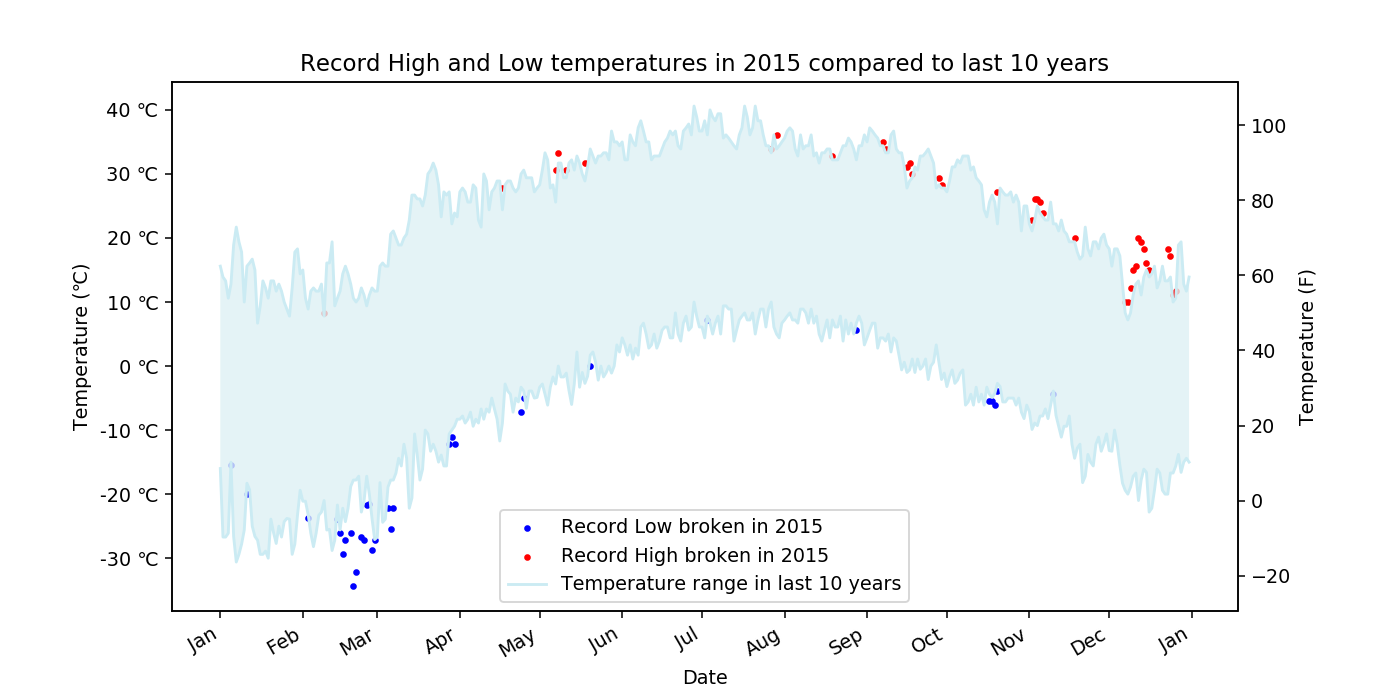

In [169]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.figure()
plt.plot(daily_temp_merged_df['Date'], daily_temp_merged_df['TMIN'],
         daily_temp_merged_df['Date'], daily_temp_merged_df['TMAX'],label='Temperature range in last 10 years' )
plt.gca().get_lines()[0].set_color('#cbebf3')
plt.gca().get_lines()[1].set_color('#cbebf3')
plt.scatter(daily_temp_merged_df['Date'].values, daily_temp_merged_df['2015_TMAX'], s=6,marker='o',
            label='Record High broken in 2015',c='red' )
plt.scatter(daily_temp_merged_df['Date'].values, daily_temp_merged_df['2015_TMIN'], s=6,marker='o',
            label='Record Low broken in 2015',c='blue' )



In [170]:
# fill the area between the linear data and exponential data
plt.gca().fill_between(daily_temp_merged_df['Date'].values, 
                       daily_temp_merged_df['TMIN'],daily_temp_merged_df['TMAX'], 
                       facecolor='#def1f4',  alpha=0.8)


In [189]:
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
plt.xlabel('Date')
plt.ylabel('Temperature (℃)')
plt.title('Record High and Low temperatures in 2015 compared to last 10 years')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
#plt.legend([ 'Min temperature in last 10 years', 'Max temperature in last 10 years','Record High broken in 2015','Record Low broken in 2015'])
plt.subplot().xaxis.set_major_locator(mdates.MonthLocator())
plt.subplot().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.subplot().yaxis.set_major_formatter(FormatStrFormatter('% 1.0f ℃'))

for label in plt.subplot().get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

ax2 = plt.subplot().twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Temperature (F)')  # we already handled the x-label with ax1
ax2.plot(daily_temp_merged_df['Date'],( daily_temp_merged_df['TMIN'] * 1.8) + 32, 
         daily_temp_merged_df['Date'], ( daily_temp_merged_df['TMAX'] * 1.8) + 32,
         color="#ffffff", alpha=0)
ax2.tick_params(axis='y')

In [172]:
handles, labels = plt.subplot().get_legend_handles_labels()
plt.legend(reversed(handles[1:4]), reversed(labels[1:4]))
